# Neural Style Transfer(NST) with Pytorch

There are two type of models: one style and two style transferring.

CHANGE Runtime Type!

In [1]:
#uncomment if getting errors with pillow and torchmodels on Colab
!pip3 install pillow==4.1.1

In [0]:
#run this ONLY if you're working in Colab
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth                    
from oauth2client.client import GoogleCredentials
auth.authenticate_user()                         
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
your_module = drive.CreateFile({"id": "1mHpK-z91eFWUWNnMMDLVsLxyla99Pg2R"})   # "your_module_file_id" is the part after "id=" in the shareable link
your_module.GetContentFile("utils.py")
from utils import Load_image,Show_images,Save_image,Make_gif
your_module = drive.CreateFile({"id": "1rHCNpxVPvKxHvFkTGjTCPxVnEG7phcpM"})   # "your_module_file_id" is the part after "id=" in the shareable link
your_module.GetContentFile("nstmodels.py")
from nstmodels import run_2style_transfer,run_1style_transfer

import torchvision.models as models
import torch
import warnings
warnings.simplefilter('ignore')

In [3]:
#run this ONLY if you're working in Colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
#run this ONLY if you're working on your local runtime
from utils import Load_image,Show_images,Save_image,Make_gif
from nstmodels import run_2style_transfer,run_1style_transfer
import torchvision.models as models
import torch
import warnings
warnings.simplefilter('ignore')

In [3]:
#run this ONLY if you're working in Colab
!ls 'drive/My Drive/NSTmodels/images' #check location of your images

alex1.jpg  dancing.jpg	malevich1.jpg  munk.jpg    picasso.jpg
alex.jpg   feit.jpg	malevich2.jpg  photo1.jpg  shagal.jpg
dali.jpg   lisa.jpg	mone.jpg       photo.jpg


In [3]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

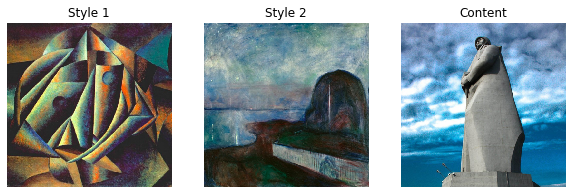

In [2]:
#loading pics
#insert your path to images
style1 = Load_image('images/malevich1.jpg',imsize=512)
style2 = Load_image('images/munk.jpg',imsize=512)
content = Load_image('images/alex.jpg',imsize=512)
#making pics list
pics =[[style1,'Style 1'],[style2,'Style 2'],[content,'Content']]
#drawing
Show_images(pics)

In [4]:
#loading pretrained encoder from VGG19
cnn = models.vgg19(pretrained=True).features.to(device).eval()

In [5]:
#specify layers for for getting losses
content_layers = ['conv_4','conv_6']
style_layers = ['conv_1', 'conv_2', 'conv_3', 'conv_4', 'conv_5', 'conv_6' ]

In [6]:
torch.cuda.empty_cache()

### Используем модель для добавлениях двух стилей на картинку

In [7]:
#change verbose=True for viewing changes in pic every 50 epochs
input_img = content.clone()
output, imgs = run_2style_transfer(cnn, content, style1, style2, input_img,
                                  content_layers, style_layers, num_steps=500,
                                  style_weight=1000000,style_weight2=100000,content_weight=1,verbose=False)

Building the style transfer model..
Optimizing..
run [50]:
Style1 Loss : 10904751.000000 Style2 Loss : 26046616.000000 Content Loss: 42.706940

run [100]:
Style1 Loss : 4124035.000000 Style2 Loss : 26090722.000000 Content Loss: 49.460464

run [150]:
Style1 Loss : 3264682.250000 Style2 Loss : 26209430.000000 Content Loss: 51.483395

run [200]:
Style1 Loss : 3040008.000000 Style2 Loss : 26227988.000000 Content Loss: 52.291649

run [250]:
Style1 Loss : 2929082.750000 Style2 Loss : 26250784.000000 Content Loss: 52.897804

run [300]:
Style1 Loss : 2888734.750000 Style2 Loss : 26234284.000000 Content Loss: 53.410461

run [350]:
Style1 Loss : 2818895.250000 Style2 Loss : 26259772.000000 Content Loss: 54.013142

run [400]:
Style1 Loss : 2793820.750000 Style2 Loss : 26249328.000000 Content Loss: 54.693466

run [450]:
Style1 Loss : 2769235.750000 Style2 Loss : 26248562.000000 Content Loss: 55.237991

run [500]:
Style1 Loss : 2751002.250000 Style2 Loss : 26248346.000000 Content Loss: 55.719658



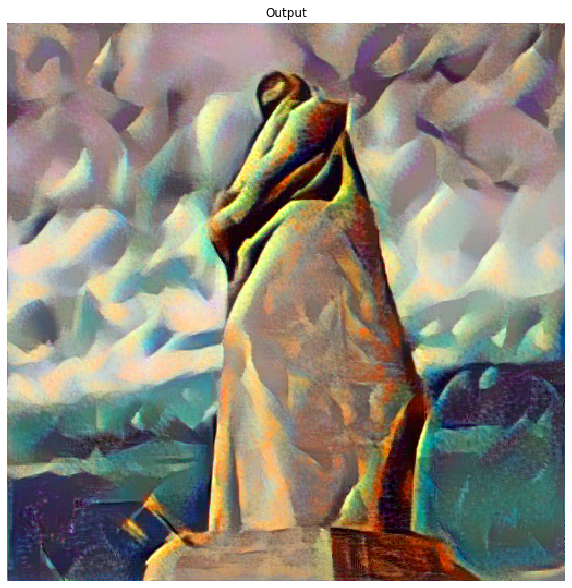

In [8]:
Show_images([[output,'Output']])

In [0]:
Save_image(output,'output.jpg',colab=False)

In [0]:
#run for downloading from Colab
from google.colab import files
files.download('output.jpg')